In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import operator
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = [12,12]

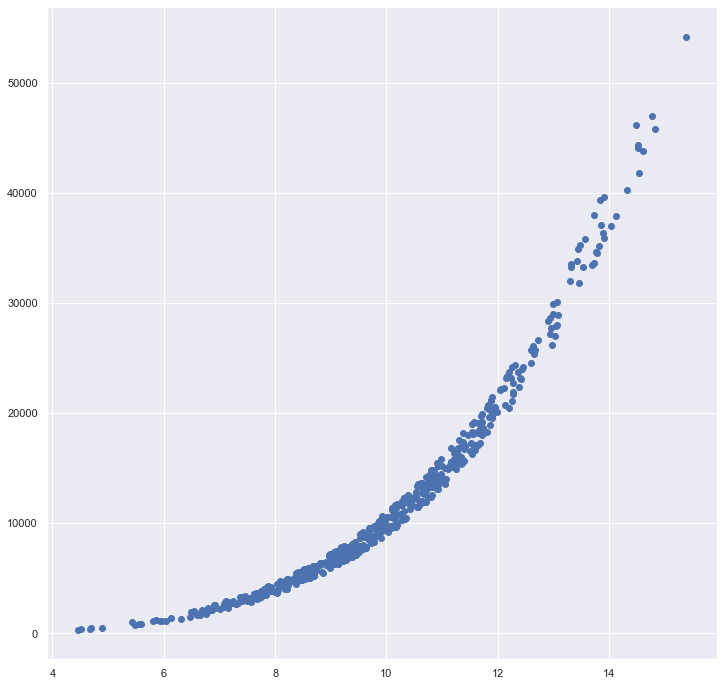

In [54]:
np.random.seed(0)
#jeu de données sous la forme y = f(x)  avec f(x) = x^4 + bx^3 + c 
 
x = np.random.normal(10, 2, 500)
y = x ** 4 + np.random.uniform(-1, 1,500)*(x ** 3) + np.random.uniform(0, 1,500)
 
plt.scatter(x,y)
plt.show()

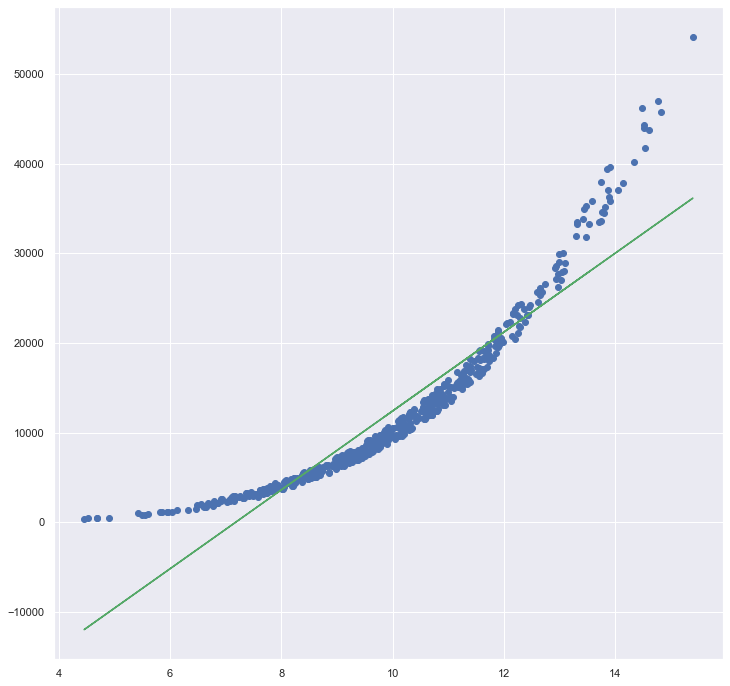

Mean squared error: 11232199.76
Coefficient of determination: 0.87


In [55]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
 
model.fit(x,y)
y_predict = model.predict(x)
 
plt.scatter(x, y)
plt.plot(x, y_predict, color='g')
plt.show()

#print(y.dtypes)
#print(y_predict)

print("Mean squared error: %.2f" % mean_squared_error(list(y), list(y_predict)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(list(y), list(y_predict)))

erreur :  735.9164925748672
r2 :  0.9938759791540012


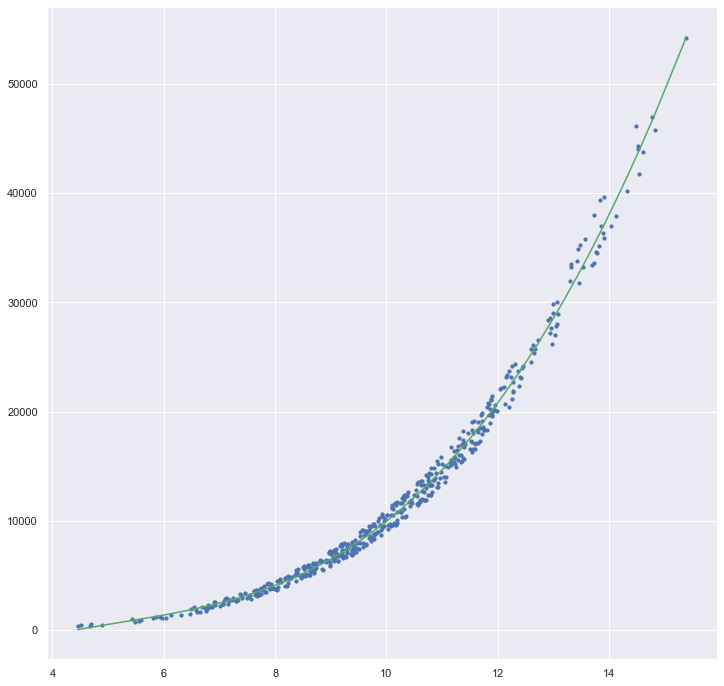

In [60]:
polynomial_features = PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
 
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("erreur : ",rmse)
print("r2 : ",r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_p, y_poly_pred_P = zip(*sorted_zip)
plt.plot(x_p, y_poly_pred_P, color='g')
plt.show()

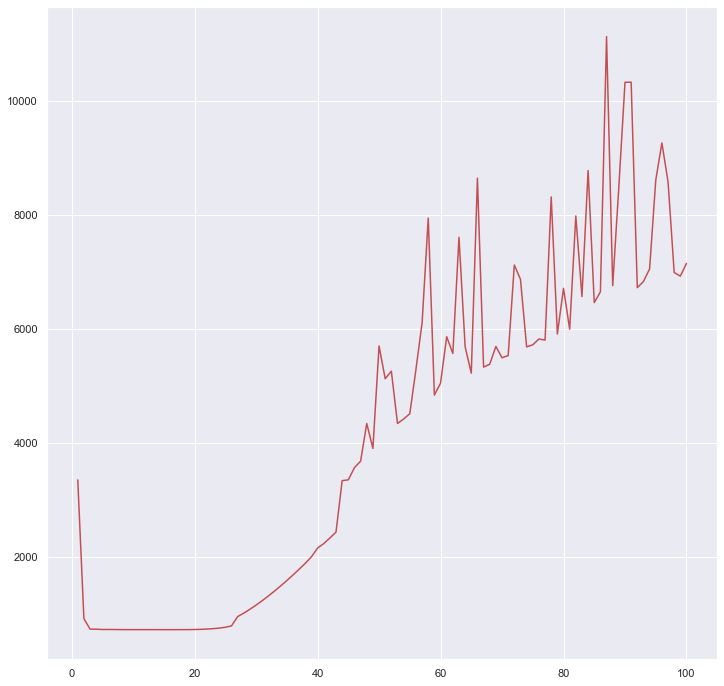

In [51]:
# Over-fitting et l’Under-fitting

def degreeChoice (x,y,degree):
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x_p, y_poly_pred_P = zip(*sorted_zip)
    return rmse, x_p, y_poly_pred_P
 
rmselist = np.zeros(100)
x_p_list = [None]*100
y_poly_pred_P_list=[None]*100

for i in np.arange(1, 101):
     
    rmselist[i-1] ,x_p_list[i-1],y_poly_pred_P_list[i-1]= degreeChoice (x,y,i)
     
plt.plot(np.arange(1, 101), rmselist, color='r')
plt.show()

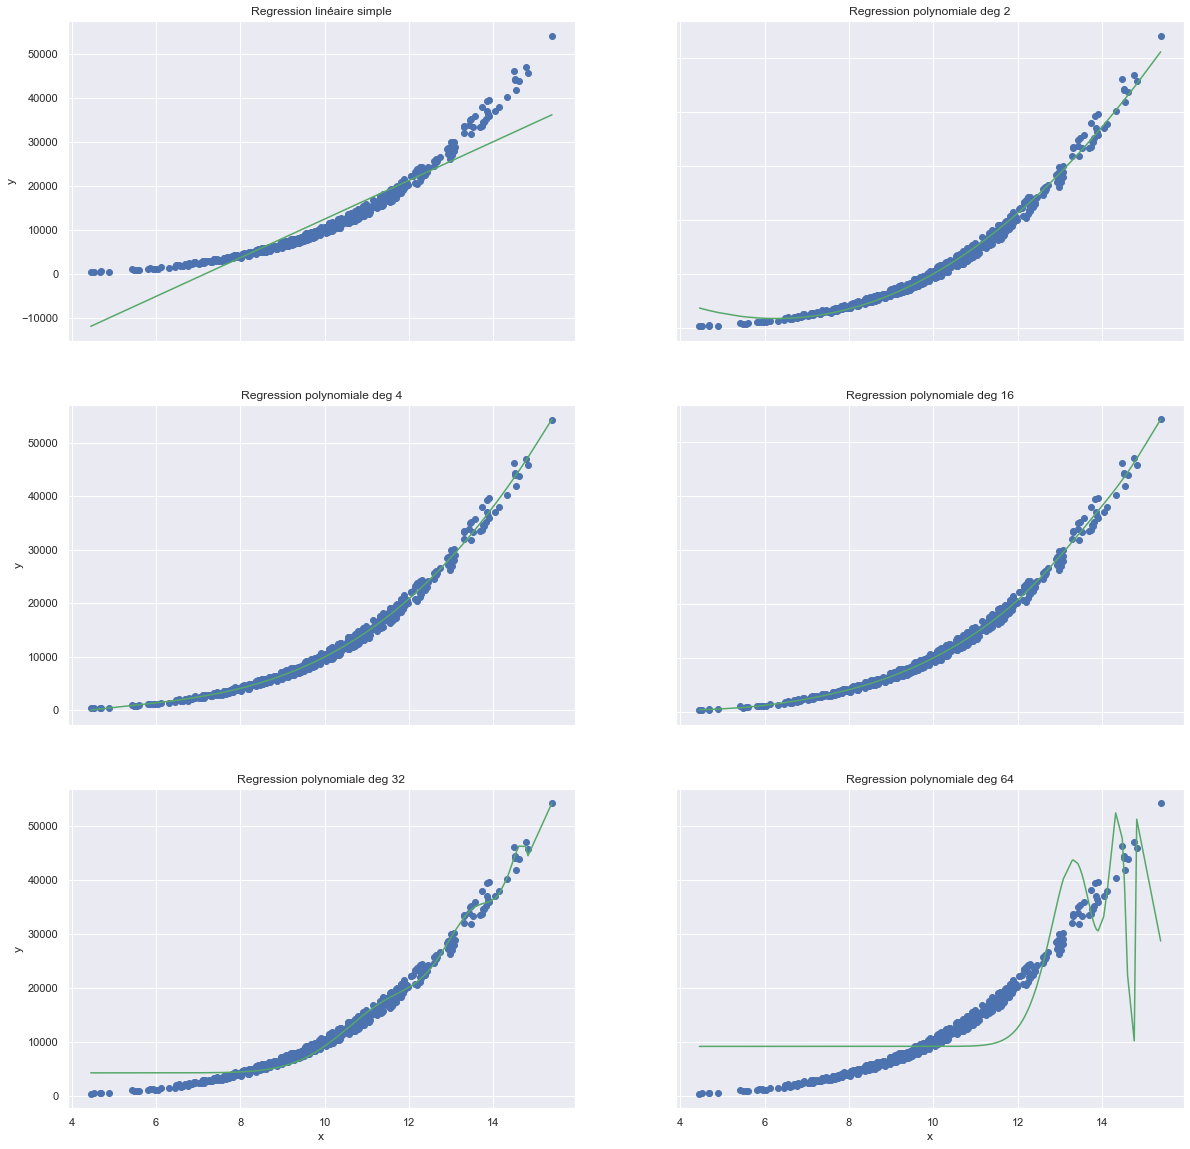

In [61]:
fig, axs = plt.subplots(3, 2,figsize=(20,20))
 
 
axs[0, 0].scatter(x, y)
axs[0, 0].plot(x_p_list[0],y_poly_pred_P_list[0],color='g')
axs[0, 0].set_title('Regression linéaire simple')
 
#degre 2
axs[0, 1].scatter(x, y)
axs[0, 1].plot(x_p_list[1],y_poly_pred_P_list[1],color='g')
axs[0, 1].set_title('Regression polynomiale deg 2')
 
 
#degre 4
axs[1, 0].scatter(x, y)
axs[1, 0].plot(x_p_list[3],y_poly_pred_P_list[3],color='g')
axs[1, 0].set_title('Regression polynomiale deg 4')
 
 
#degre 16
axs[1, 1].scatter(x, y)
axs[1, 1].plot(x_p_list[15],y_poly_pred_P_list[15],color='g')
axs[1, 1].set_title('Regression polynomiale deg 16')
 
#degre 32
axs[2, 0].scatter(x, y)
axs[2, 0].plot(x_p_list[31],y_poly_pred_P_list[31],color='g')
axs[2, 0].set_title('Regression polynomiale deg 32')
 
#degre 64
axs[2, 1].scatter(x, y)
axs[2, 1].plot(x_p_list[63],y_poly_pred_P_list[63],color='g')
axs[2, 1].set_title('Regression polynomiale deg 64')
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
 
for ax in axs.flat:
    ax.label_outer()

In [78]:
donnees_boston = load_boston()
 
#Transformation de notre jeu de données en Data Frame grace à pandas
donnees_boston_df = pd.DataFrame(donnees_boston.data, columns=donnees_boston.feature_names)

#on utilise seulement 4 variables explicatives
X = pd.DataFrame(np.c_[donnees_boston_df['LSTAT'],donnees_boston_df['RM'],donnees_boston_df['TAX'],donnees_boston_df['PTRATIO']], columns = ['LSTAT','RM','TAX','PTRATIO'])

donnees_boston_df['PRIX'] = donnees_boston.target
Y = donnees_boston_df['PRIX']

  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#on defintit la fonction pour entrainer et choisir notre modèle en fonction du degré du polynome
 
def evalPolynonmialRegression(degree):
    #entrainement du modèle
    polynomial_features= PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    # Evaluation du training set
 
    y_train_predict = model.predict(X_train_poly)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
 
    print('La performance du modèle sur la base dapprentissage')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    print('\n')
 
    # Evaluation du testing set
    y_test_predict = model.predict(X_test_poly)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)
 
    print('La performance du modèle sur la base de test')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    return model,r2 ,rmse

evalPolynonmialRegression(4)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

(LinearRegression(), 0.8473483419281267, 3.457121472349466)